In [1]:
import json
import numpy as np
from pathlib import Path
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import random

# Train data

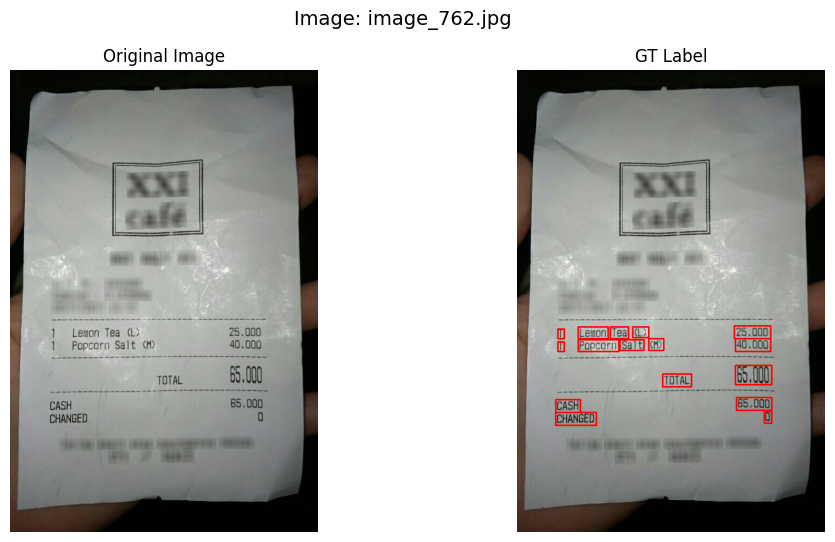

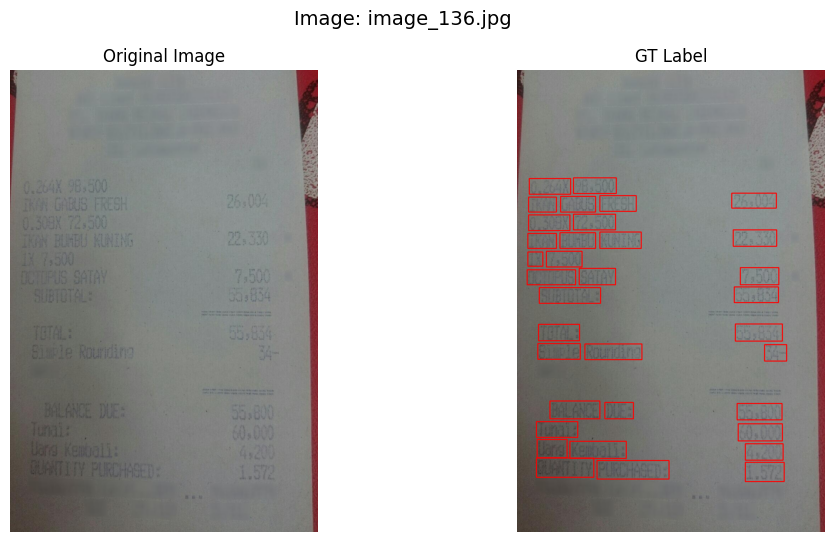

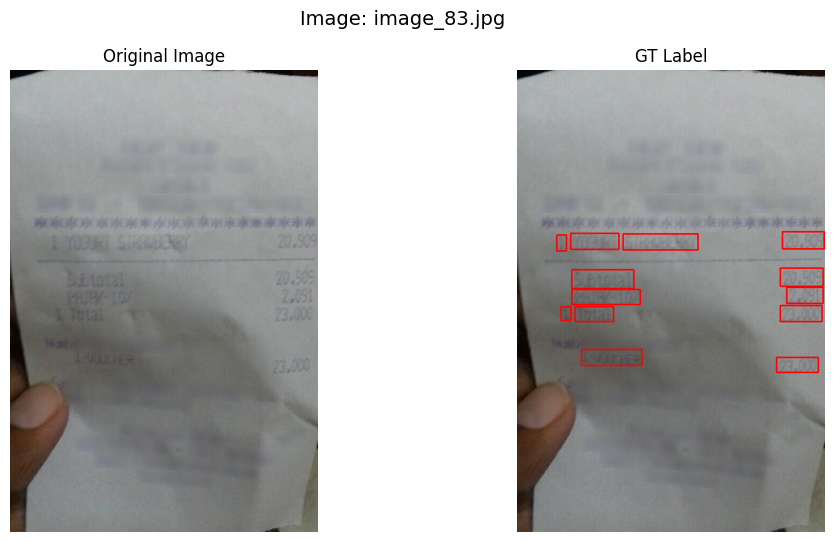

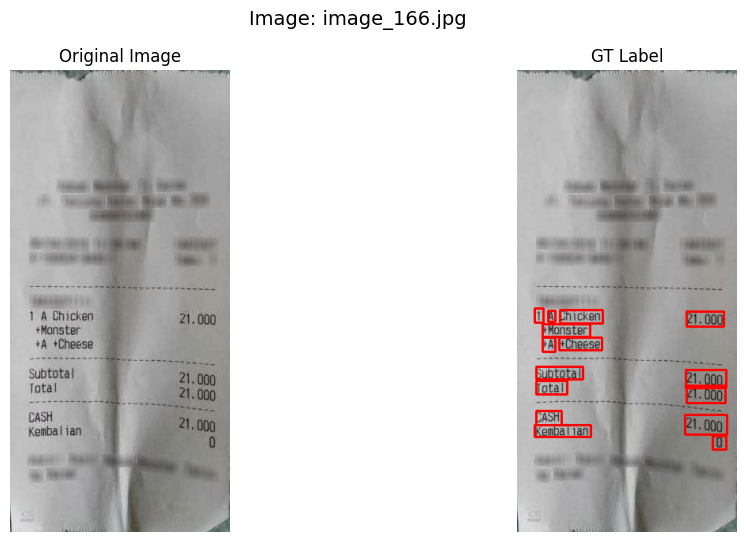

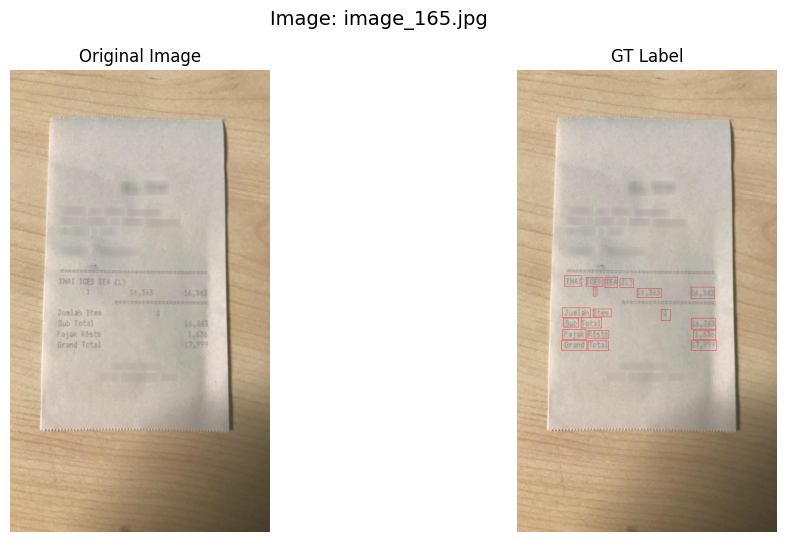

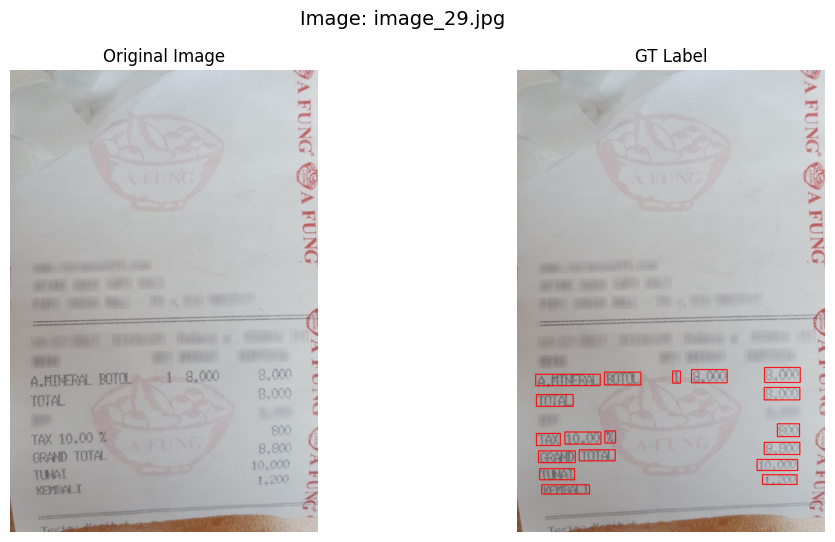

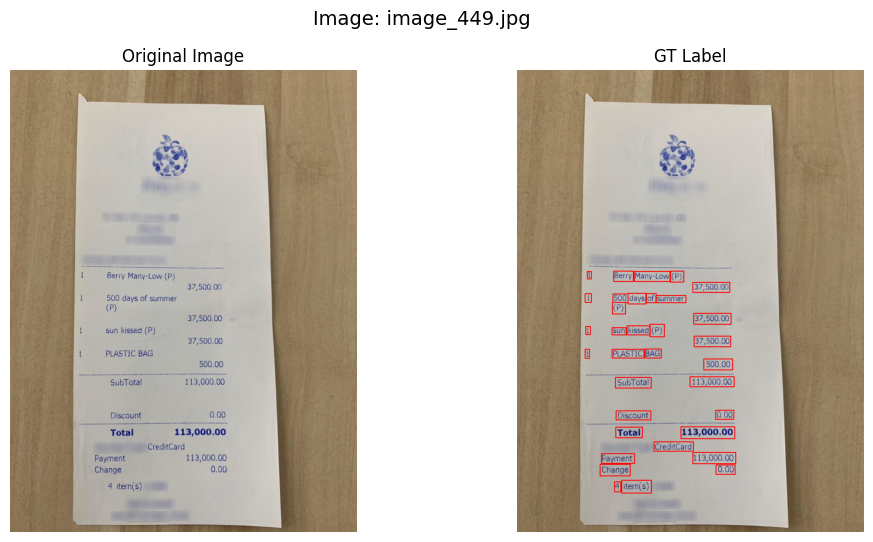

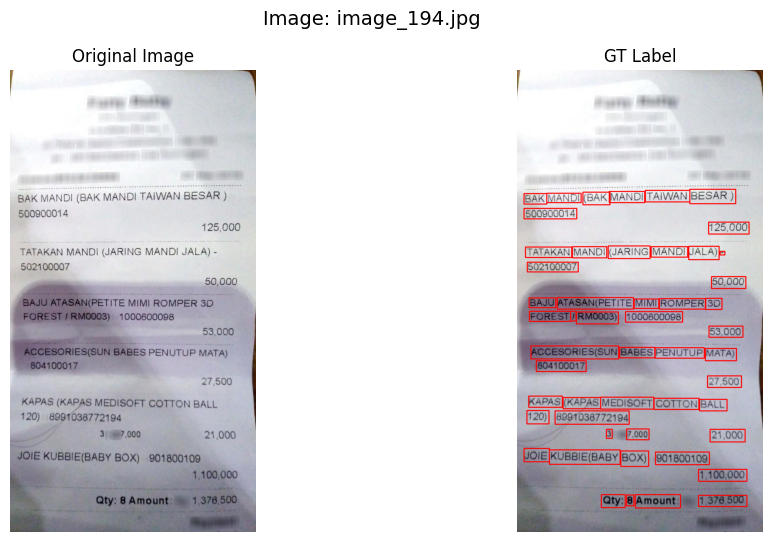

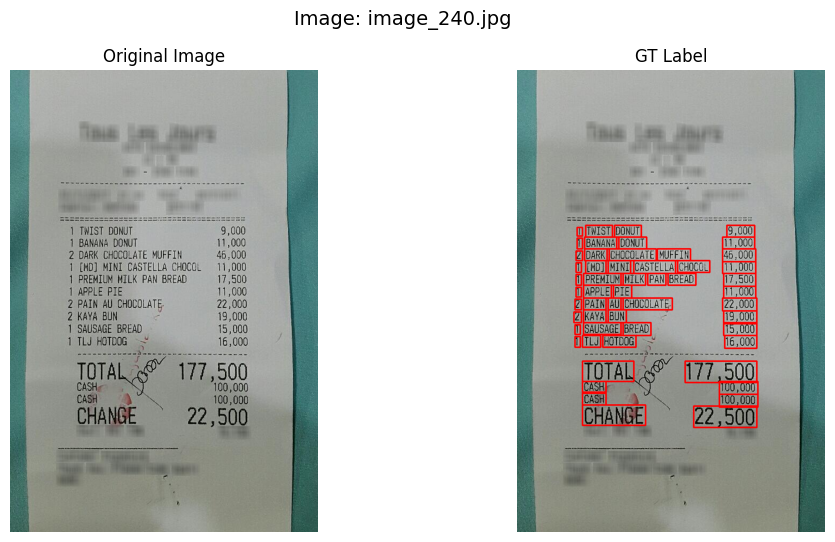

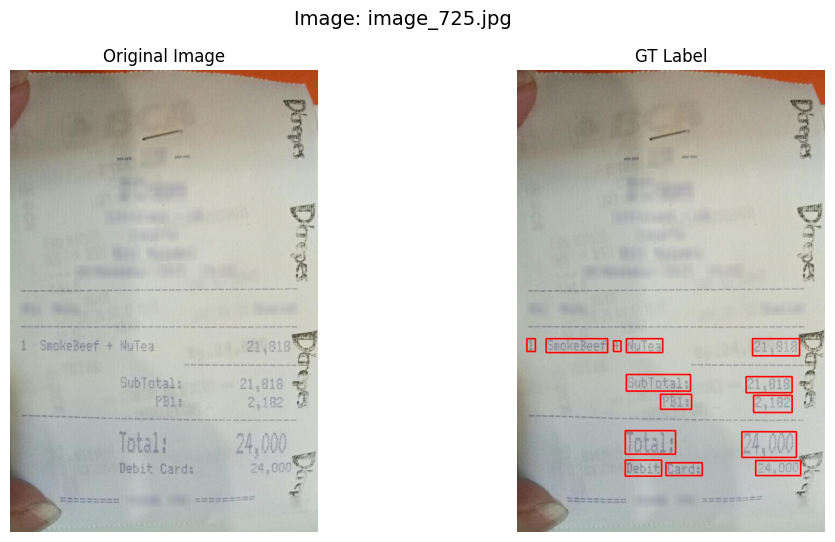

In [6]:
def read_json(filename):
    with Path(filename).open(encoding='utf8') as handle:
        ann = json.load(handle)
    return ann

######################## Variable ########################
# 언어 선택 (chinese, thai, japanese, vietnamese)
language = 'thai'
img_num = 10   # 한번에 확인할 수 있는 이미지 개수 10개로 고정
start_idx = 50
##########################################################

# GT json 파일 로드
# gt_data = read_json(f'/data/ephemeral/home/cherry/code/data/{language}_receipt/ufo/train.json')
gt_data = read_json("C:/Users/Daehwan/Documents/8_project/07_OCR/level2-cv-datacentric-cv-11/03_train_val/data/custom_receipt/ufo/train.json")

# 10개 항목 선택
sample_items = list(gt_data['images'].items())[start_idx : start_idx + img_num]

for img_name, value in sample_items:
    img_path = f'C:/Users/Daehwan/Documents/8_project/07_OCR/level2-cv-datacentric-cv-11/03_train_val/data/custom_receipt/img/train/{img_name}'
    img = cv2.imread(img_path)
    if img is None:
        print(f'Unable to load image: {img_name}')
        continue
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f"Image: {img_name}", fontsize=14, color='black')
    
    # 왼쪽: 원본 이미지
    axes[0].imshow(img)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    # 오른쪽: GT 이미지
    # bbox 
    for word_data in value['words'].values():
        points = word_data['points']
        points = [(int(x), int(y)) for x, y in points]
        # 4개 점 연결하여 실제 bbox 그림
        for i in range(4):
            strt_point = points[i]
            end_point = points[(i+1)%4] # 마지막 점과 첫번째 점 연결
            cv2.line(img, strt_point, end_point, color=(255, 0, 0), thickness=2)
    axes[1].imshow(img)
    axes[1].set_title('GT Label')
    axes[1].axis('off')    

    plt.show()

# Test data

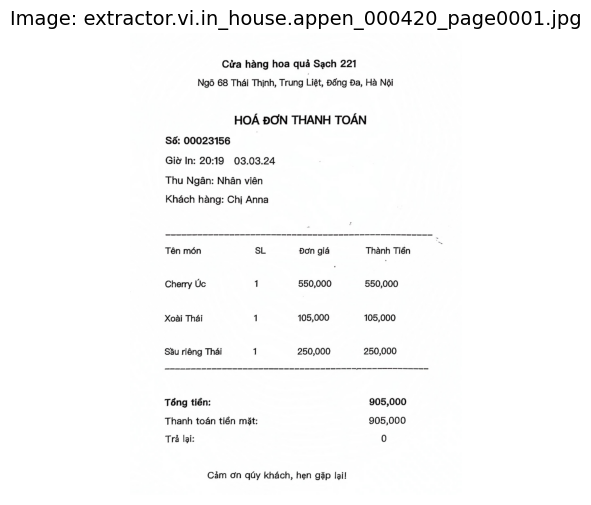

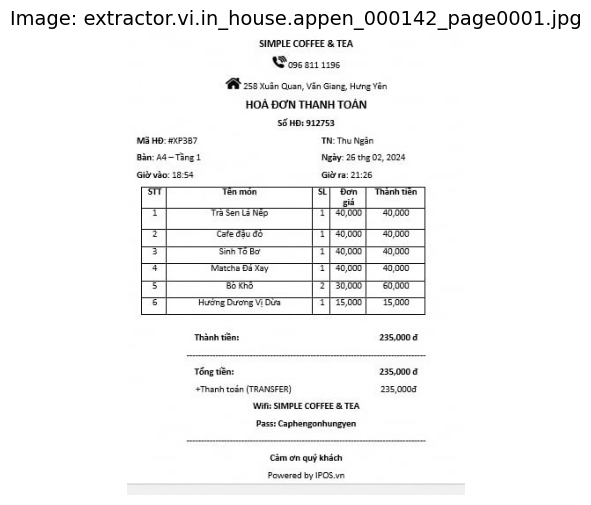

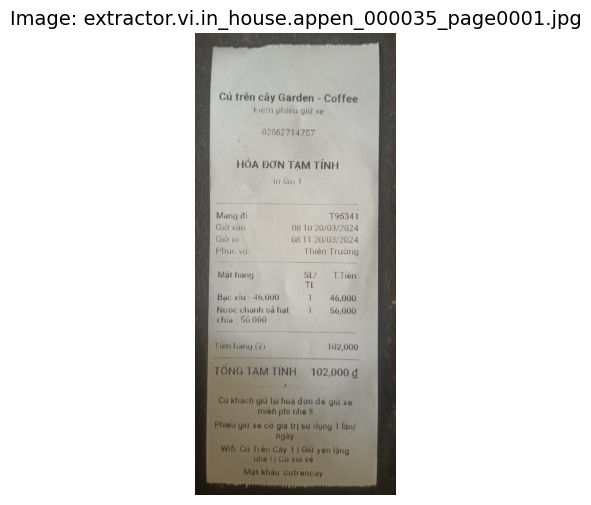

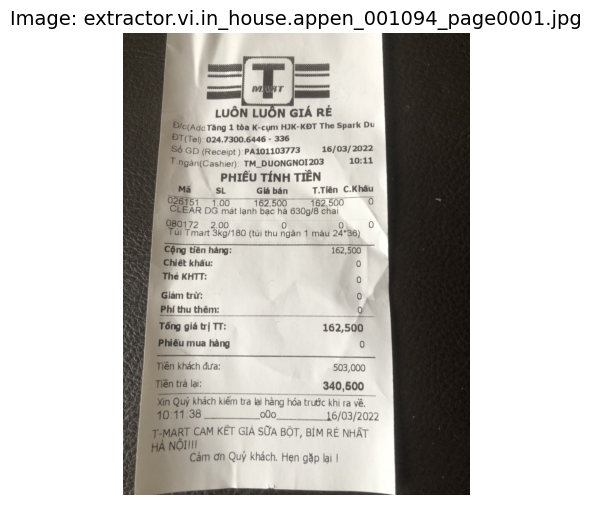

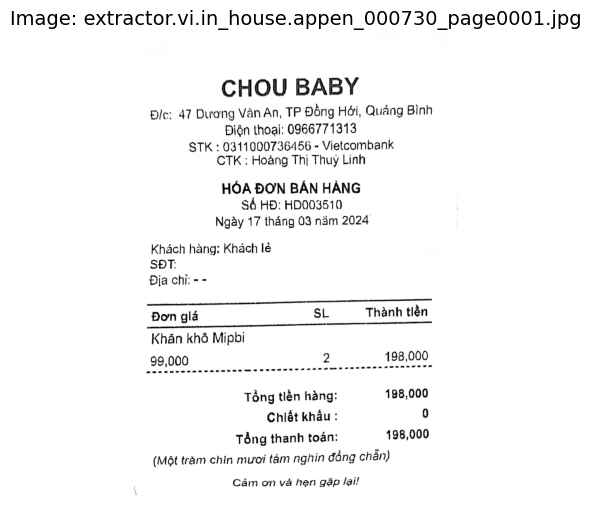

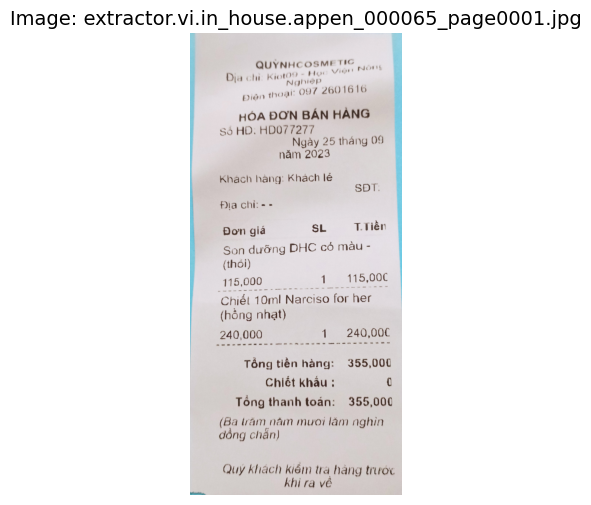

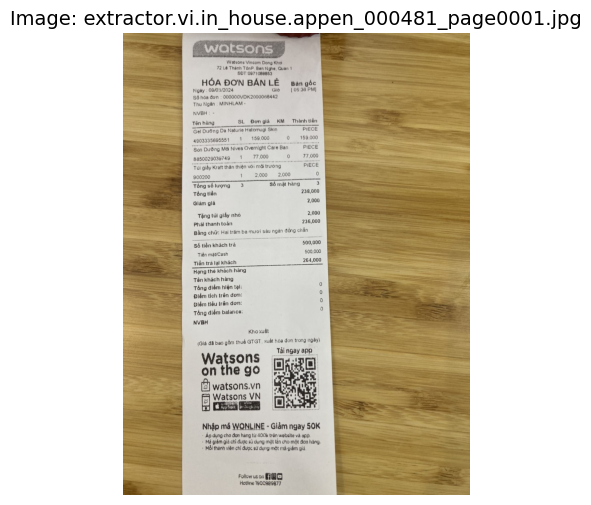

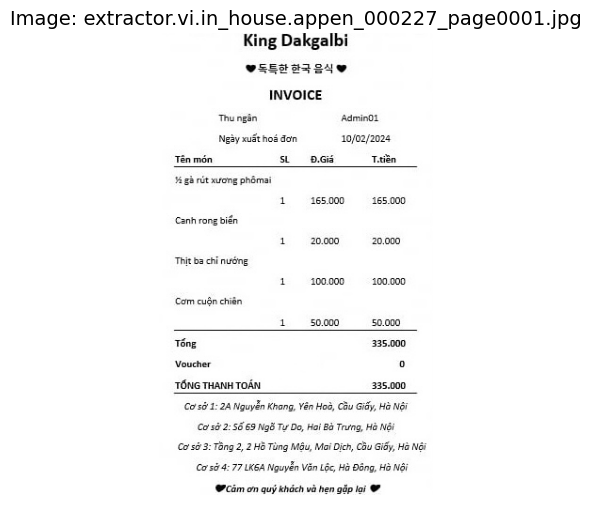

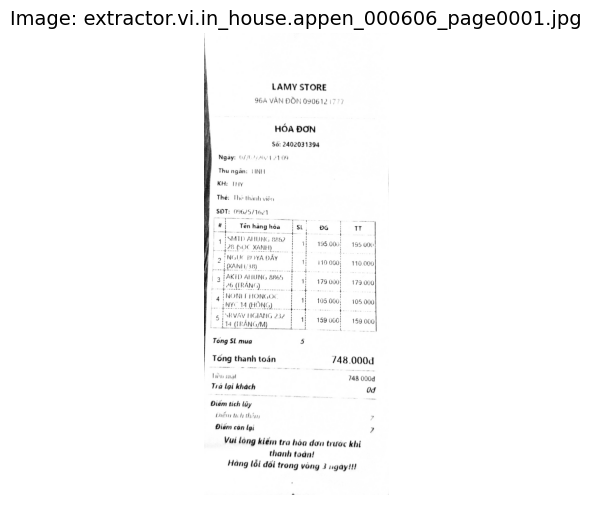

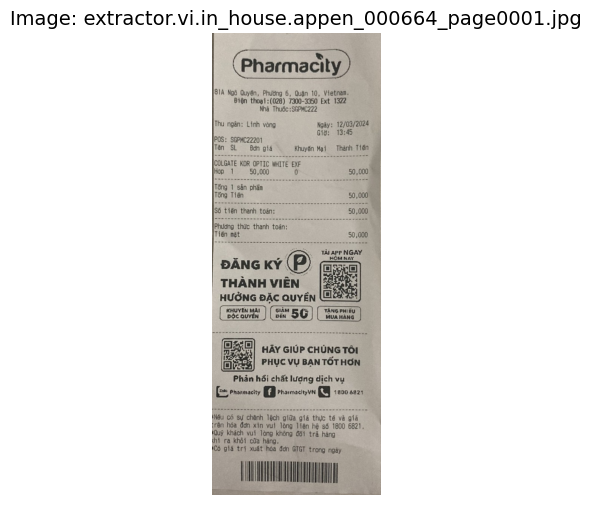

In [23]:
def read_json(filename):
    with Path(filename).open(encoding='utf8') as handle:
        ann = json.load(handle)
    return ann

######################## Variable ########################
# 언어 선택 (chinese, thai, japanese, vietnamese)
language = 'vietnamese'
img_num = 10   # 한번에 확인할 수 있는 이미지 개수 10개로 고정
start_idx = 0
##########################################################

# GT json 파일 로드
gt_data = read_json(f'/data/ephemeral/home/cherry/code/data/{language}_receipt/ufo/test.json')

# 10개 항목 선택
sample_items = list(gt_data['images'].items())[start_idx : start_idx + img_num]

for img_name, value in sample_items:
    img_path = f'/data/ephemeral/home/cherry/code/data/{language}_receipt/img/test/{img_name}'
    img = cv2.imread(img_path)
    if img is None:
        print(f'Unable to load image: {img_name}')
        continue
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(12, 6))
    plt.title(f"Image: {img_name}", fontsize=14, color='black')
    plt.imshow(img)
    plt.axis('off')
    
    plt.show()